In [1]:
import numpy as np
import pandas as pd

In [4]:
#!pip install pandas-datareader

In [5]:
# data scrape package
import pandas_datareader.data as web

In [6]:
# plotting package
import matplotlib.pyplot as plt
# scaling package
from sklearn.preprocessing import MinMaxScaler

In [30]:
# keras network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
# set random seed
import random
random.seed(2505)

#### get and clean data

In [9]:
# daily data on gold
tick = 'GC=f'
gold = web.get_data_yahoo(tick, '12/20/2015', interval='d')

In [10]:
gold

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-21,1081.900024,1070.199951,1070.199951,1081.900024,26.0,1081.900024
2015-12-22,1078.599976,1073.800049,1078.599976,1074.800049,106.0,1074.800049
2015-12-23,1074.800049,1069.400024,1074.500000,1069.400024,202.0,1069.400024
2015-12-24,1077.800049,1073.500000,1074.300049,1077.199951,24.0,1077.199951
2015-12-28,1098.800049,1070.500000,1077.900024,1070.500000,361.0,1070.500000
...,...,...,...,...,...,...
2022-05-31,1862.099976,1832.800049,1850.300049,1842.699951,4073.0,1842.699951
2022-06-01,1847.900024,1825.300049,1831.000000,1843.300049,1623.0,1843.300049
2022-06-02,1868.699951,1842.099976,1845.400024,1866.500000,551.0,1866.500000


In [11]:
gold.shape

(1624, 6)

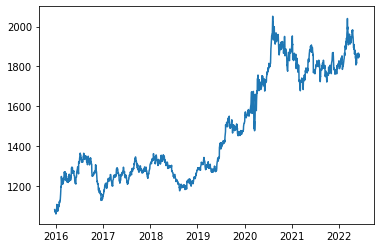

In [12]:
plt.plot(gold['Adj Close'])

In [13]:
returns = gold['Adj Close'].pct_change()
column_names = gold.columns

In [14]:
x = gold.values # returns a numpy array
x.shape

(1624, 6)

In [18]:
x[:4,:]

array([[1081.90002441, 1070.19995117, 1070.19995117, 1081.90002441,
          26.        , 1081.90002441],
       [1078.59997559, 1073.80004883, 1078.59997559, 1074.80004883,
         106.        , 1074.80004883],
       [1074.80004883, 1069.40002441, 1074.5       , 1069.40002441,
         202.        , 1069.40002441],
       [1077.80004883, 1073.5       , 1074.30004883, 1077.19995117,
          24.        , 1077.19995117]])

In [19]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [20]:
pct_c_gold = df
pct_c_gold.head()

,0,1,2,3,4,5
0,0.019703,0.011920,0.008369,0.021989,0.000067,0.021989
1,0.016436,0.015588,0.016840,0.014828,0.000274,0.014828
2,0.012673,0.011105,0.012705,0.009381,0.000523,0.009381
3,0.015644,0.015283,0.012504,0.017248,0.000062,0.017248
4,0.036436,0.012226,0.016134,0.010490,0.000934,0.010490


In [21]:
pct_c_gold.columns = column_names
pct_c_gold.head()

,High,Low,Open,Close,Volume,Adj Close
0,0.019703,0.011920,0.008369,0.021989,0.000067,0.021989
1,0.016436,0.015588,0.016840,0.014828,0.000274,0.014828
2,0.012673,0.011105,0.012705,0.009381,0.000523,0.009381
3,0.015644,0.015283,0.012504,0.017248,0.000062,0.017248
4,0.036436,0.012226,0.016134,0.010490,0.000934,0.010490


### Univariate Forecasting RNN

In [22]:
returns

Date
2015-12-21         NaN
2015-12-22   -0.006563
2015-12-23   -0.005024
2015-12-24    0.007294
2015-12-28   -0.006220
                ...   
2022-05-31   -0.004645
2022-06-01    0.000326
2022-06-02    0.012586
2022-06-03   -0.011305
2022-06-06    0.006069
Name: Adj Close, Length: 1624, dtype: float64

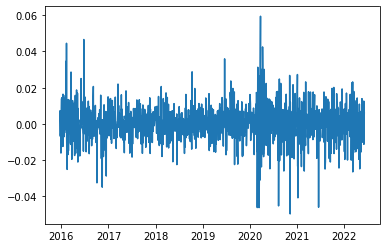

In [23]:
plt.plot(returns)

<AxesSubplot:>

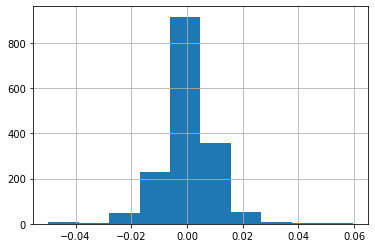

In [24]:
returns.hist()

In [25]:
# Flatten this matrix down
npa = returns.values[1:].reshape(-1, 1)
# python recognize what dimensions you need by using this parameter
npa

array([[-0.00656251],
       [-0.00502421],
       [ 0.00729374],
       ...,
       [ 0.0125861 ],
       [-0.01130457],
       [ 0.00606912]])

In [26]:
scale = MinMaxScaler(feature_range=(0,1)) # by default
npa = scale.fit_transform(npa)
print(len(npa))

1623


In [27]:
# prepare data in desired form
samples = 10 # number of samples from the past used for prediction
steps = 1 # number of steps in the future to make prediction on
X = []
Y = []
for i in range(npa.shape[0]-samples):
    X.append(npa[i:i+samples]) # independent samples
    Y.append(npa[i+samples][0]) # dependent samples
print('Training data length is ', len(X[0:1][0]),': ', X[0:1])
print('Testing data length is ', len(Y[0:1]),': ', Y[0:1])

Training data length is  10 :  [array([[0.39559946],
       [0.40967815],
       [0.52241392],
       [0.39873611],
       [0.51550642],
       [0.30786687],
       [0.4573878 ],
       [0.58340846],
       [0.48375329],
       [0.57023212]])]
Testing data length is  1 :  [0.5880932447278658]


In [28]:
# reshape data so that the inputs will be acceptable to the model
# 15.33
X = np.array(X)
Y = np.array(Y)
print('Dimensions of X', X.shape, 'Dimensions of Y', Y.shape)

threshold = round(0.9*X.shape[0])
print('Threshold is', threshold)

Dimensions of X (1613, 10, 1) Dimensions of Y (1613,)
Threshold is 1452


In [31]:
# build the RNN
model = keras.Sequential()

# Add a RNN layer with 3 units
model.add(layers.SimpleRNN(3,
                          activation = 'tanh',
                          use_bias = True,
                          input_shape=(X.shape[1],X.shape[2])))

# add a dropout layer (penalizing more complex models) - prevents overfitting
model.add(layers.Dropout(rate=0.2))

# evaluating loss function of MSE using the adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# print out architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 3)                 15        
_________________________________________________________________
dropout (Dropout)            (None, 3)                 0         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [32]:
# fitting the data
history = model.fit(X[:threshold],
                   Y[:threshold],
                   shuffle = False, # this is a time series data
                   epochs=100,
                   batch_size=32,
                   validation_split=0.2,
                   verbose=1)

Epoch 1/100
37/37 [==============================] - 1s 9ms/step - loss: 0.5107 - val_loss: 0.3150
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 0.2801 - val_loss: 0.1550
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 0.1604 - val_loss: 0.0967
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 0.1124 - val_loss: 0.0707
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0852 - val_loss: 0.0576
Epoch 6/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0771 - val_loss: 0.0496
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0743 - val_loss: 0.0445
Epoch 8/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0697 - val_loss: 0.0407
Epoch 9/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0661 - val_loss: 0.0370
Epoch 10/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0674 - val_loss: 0.0345
Epoch 11/

37/37 [==============================] - 0s 5ms/step - loss: 0.0526 - val_loss: 0.0177
Epoch 84/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0532 - val_loss: 0.0176
Epoch 85/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0517 - val_loss: 0.0179
Epoch 86/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0542 - val_loss: 0.0175
Epoch 87/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0517 - val_loss: 0.0175
Epoch 88/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0532 - val_loss: 0.0176
Epoch 89/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0518 - val_loss: 0.0174
Epoch 90/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0537 - val_loss: 0.0173
Epoch 91/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0516 - val_loss: 0.0174
Epoch 92/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0524 - val_loss: 0.0173
Epoch 93/100


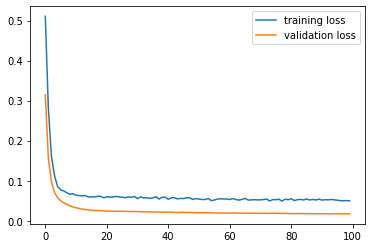

In [33]:
# plotting the loss iteration
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()

# if training loss >> validation loss, underfitting
# if training loss << validation loss, overfitting
# several ways to address overfitting
# reduce complexity of model (hidden layers, neurons, parameters input, etc)
# add droptou and tune rate
# more data

### multi-step forecast

In [35]:
# prediction using the 'sliding/rolling window appraoch'
# multi step forecast
# using self predictions for making future predictions

true_Y = Y[threshold:]
pred_Y = []
print('Number of Forecasts to do: ', Y.shape[0] - round(Y.shape[0]*0.9))
latest_input = X[threshold-1:threshold]

for i in range(Y.shape[0] - round(Y.shape[0]*0.9)):
    # prediction
    p = model.predict(latest_input.reshape(1,X.shape[1],1))[0,0]
    
    # update predictions
    pred_Y.append(p)
    latest_input = np.append(X[threshold][1:],p)

Number of Forecasts to do:  161


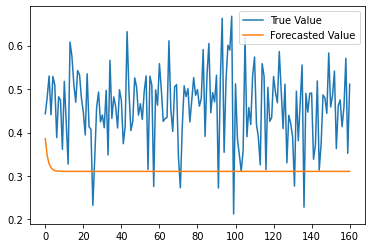

In [36]:
plt.plot(true_Y, label = 'True Value')
plt.plot(pred_Y, label = 'Forecasted Value')
plt.legend()

### Multivariate Forecasting
#### Using our training and Testing sets to create inputs

In [37]:
samples = 10
steps = 1
X = []
Y = []

for i in range(pct_c_gold.shape[0]-samples):
    X.append(pct_c_gold.iloc[i:i+samples,0:5].values)
    Y.append(pct_c_gold.iloc[i+samples,5:].values)
    
print('Training data shape is ', len(X[0:1][0]), ': ', X[0:1])
print('Testing data shape is ', len(Y[0:1]), ': ', Y[0:1])

Training data shape is  10 :  [array([[1.97029945e-02, 1.19204801e-02, 8.36939210e-03, 2.19891550e-02,
        6.72992799e-05],
       [1.64356194e-02, 1.55884349e-02, 1.68397196e-02, 1.48275902e-02,
        2.74373987e-04],
       [1.26733157e-02, 1.11054757e-02, 1.27054297e-02, 9.38072282e-03,
        5.22863636e-04],
       [1.56436127e-02, 1.52827305e-02, 1.25038051e-02, 1.72483106e-02,
        6.21224122e-05],
       [3.64356919e-02, 1.22261844e-02, 1.61339103e-02, 1.04902402e-02,
        9.34424617e-04],
       [1.75247041e-02, 1.93581253e-02, 1.73439043e-02, 1.75509623e-02,
        6.52285328e-04],
       [8.11876354e-03, 1.22256869e-03, 6.75602569e-03, 0.00000000e+00,
        1.83778803e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.01808793e-04,
        2.58843384e-05],
       [2.02970297e-02, 4.78853915e-03, 1.51255409e-03, 1.51301187e-02,
        3.70146039e-04],
       [1.93069307e-02, 1.71167079e-02, 1.38146114e-02, 1.84587940e-02,
        2.12251575e-04]]

In [38]:
# reshape the data to be acceptable to the model
X = np.array(X)
Y = np.array(Y)

In [39]:
# training and testing data
threshold = round(0.9*X.shape[0])
trainX, trainY = X[:threshold], Y[:threshold]
testX, testY = X[threshold:], Y[threshold:]

In [40]:
# RNN
model = keras.Sequential()

# add a LSTM layer with 30 internal units
model.add(layers.SimpleRNN(30,
                          activation = 'tanh',
                          use_bias = True,
                          input_shape=(trainX.shape[1],trainX.shape[2])))

# add a dropout layer (penalizing more complex models), prevents overfitting
model.add(layers.Dropout(rate=0.2))

# add a dense layer with 1 unit - regression task
model.add(layers.Dense(1))

# evaluating loss function of MSE using the adama optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# print out architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 30)                1080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 1,111
Trainable params: 1,111
Non-trainable params: 0
_________________________________________________________________


In [41]:
# fitting the data
history = model.fit(trainX,
                   trainY,
                   shuffle = False, # since it is time series data
                   epochs=100,
                   batch_size=32,
                   validation_split=0.2,
                   verbose=1)

Epoch 1/100
37/37 [==============================] - 1s 10ms/step - loss: 0.0208 - val_loss: 0.0025
Epoch 2/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0121 - val_loss: 0.0062
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.0013
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0021
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0041 - val_loss: 8.4106e-04
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0033 - val_loss: 9.3613e-04
Epoch 7/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 9.5441e-04
Epoch 8/100
37/37 [==============================] - 0s 5ms/step - loss: 0.0026 - val_loss: 8.6809e-04
Epoch 9/100
37/37 [==============================] - 0s 7ms/step - loss: 0.0025 - val_loss: 6.4967e-04
Epoch 10/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0020 - val_l

37/37 [==============================] - 0s 5ms/step - loss: 7.0200e-04 - val_loss: 5.0190e-04
Epoch 80/100
37/37 [==============================] - 0s 6ms/step - loss: 7.7510e-04 - val_loss: 4.4575e-04
Epoch 81/100
37/37 [==============================] - 0s 9ms/step - loss: 6.7246e-04 - val_loss: 3.8741e-04
Epoch 82/100
37/37 [==============================] - 0s 6ms/step - loss: 5.8959e-04 - val_loss: 3.8805e-04
Epoch 83/100
37/37 [==============================] - 0s 6ms/step - loss: 6.9992e-04 - val_loss: 4.6070e-04
Epoch 84/100
37/37 [==============================] - 0s 5ms/step - loss: 7.3840e-04 - val_loss: 4.7261e-04
Epoch 85/100
37/37 [==============================] - 0s 5ms/step - loss: 7.5781e-04 - val_loss: 3.9250e-04
Epoch 86/100
37/37 [==============================] - 0s 5ms/step - loss: 6.1343e-04 - val_loss: 4.3298e-04
Epoch 87/100
37/37 [==============================] - 0s 5ms/step - loss: 6.3067e-04 - val_loss: 6.3298e-04
Epoch 88/100
37/37 [=====================

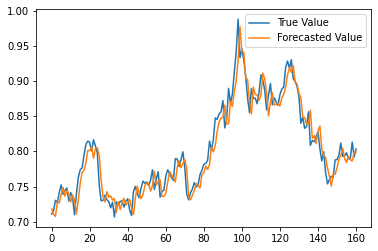

In [42]:
# pme step fprecast
y_pred = model.predict(testX)
plt.plot(testY, label = 'True Value')
plt.plot(y_pred, label = 'Forecasted Value')
plt.legend()

In [44]:
# prediction usign the 'sliding rolling window approach'
# multi step forecast
# you need to predict other items first